<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"><h1>Visualization for Science</h1>
<h1>Rotating Global Heatmap</h1>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.collections import LineCollection
from matplotlib import animation, rc

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import tqdm as tq
from tqdm import tqdm

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 4250153abc6f499c30ded326244abb4d679459b4

pandas    : 1.1.3
matplotlib: 3.3.2
numpy     : 1.19.2
cartopy   : 0.18.0
tqdm      : 4.62.0
json      : 2.0.9
watermark : 2.1.0



Load default figure style

# Load the raw data

In [3]:
data = pd.read_fwf('https://raw.githubusercontent.com/DataForScience/Viz4Sci/master/data/amaps.txt',
                  skiprows=1, header=0, sep="\t", widths=[4, 5, 8, 8, 16])

In [4]:
data.describe()

,i,j,lon,lat,"array(i,j)"
count,16200.000000,16200.00000,16200.000000,16200.00000,16200.000000
mean,90.500000,45.50000,0.000000,0.00000,0.434452
std,51.962326,25.97996,103.924652,51.95992,1.421305
min,1.000000,1.00000,-179.000000,-89.00000,-7.632800
25%,45.750000,23.00000,-89.500000,-45.00000,-0.354000
50%,90.500000,45.50000,0.000000,0.00000,0.154500
75%,135.250000,68.00000,89.500000,45.00000,0.916300
max,180.000000,90.00000,179.000000,89.00000,7.894100


Reshape the data back into array form

In [5]:
img = data[data.columns[-1]].values.reshape(90, 180)[::-1,:]

Generate a quick visualization

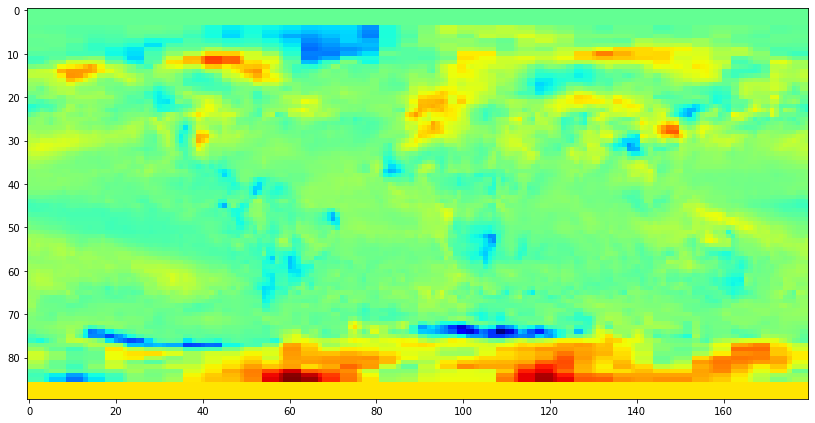

In [6]:
fig, ax = plt.subplots(1, figsize=(14, 10))

ax.imshow(img, cmap=plt.cm.jet) 

# Cartopy visualization

We can add a fair amount more of detail with the help of cartopy

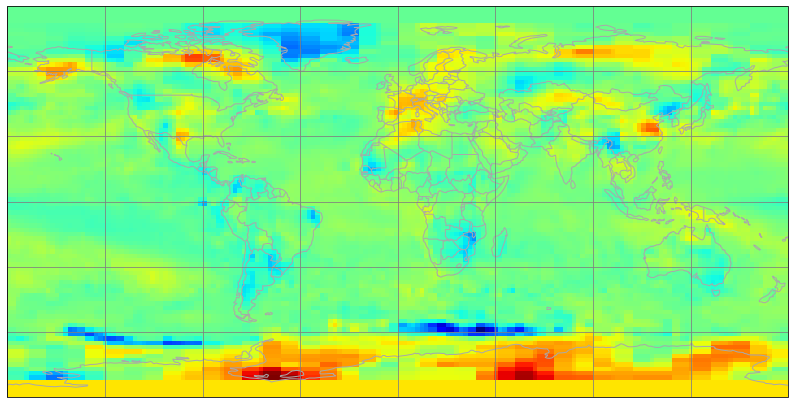

In [7]:
ax = plt.axes(projection=ccrs.PlateCarree())
fig = plt.gcf()

# Draw country borders
ax.add_feature(cartopy.feature.BORDERS, edgecolor='darkgray', lw=1)
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='darkgray', lw=1)

# Add longitude and latitude grid lines
ax.gridlines(draw_labels=False, dms=True, 
             xlocs=np.arange(-180, 180.1, 45), 
             ylocs=np.arange(-90, 90.1, 30),
             x_inline=False, y_inline=False, color='gray')

# Longitude corresponds to the x-axis and Latitude to the y-axis.
ax.imshow(img, origin="upper", extent=(-180, 180, -90, 90),
          # Tell cartopy what the original projection of the data is
          transform=ccrs.PlateCarree(), 
          cmap=plt.cm.jet, zorder=-1) 

fig.set_size_inches(14, 10)

Transform into a globe

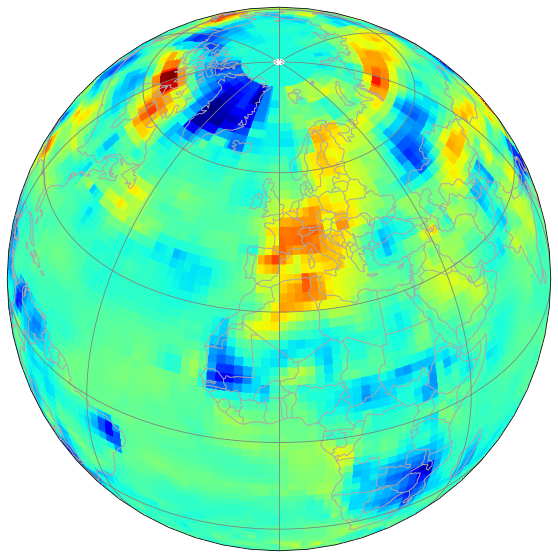

In [8]:
ax = plt.axes(projection=ccrs.Orthographic(0, 37))
fig = plt.gcf()

# Draw country borders
ax.add_feature(cartopy.feature.BORDERS, edgecolor='darkgray', lw=1)
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='darkgray', lw=1)

# Add longitude and latitude grid lines
ax.gridlines(draw_labels=False, dms=True, 
             xlocs=np.arange(-180, 180.1, 45), 
             ylocs=np.arange(-90, 90.1, 30),
             x_inline=False, y_inline=False, color='gray')

# Longitude corresponds to the x-axis and Latitude to the y-axis.
ax.imshow(img, origin="upper", extent=(-180, 180, -90, 90),
          # Tell cartopy what the original projection of the data is
          transform=ccrs.PlateCarree(), 
          cmap=plt.cm.jet, zorder=-1) 

fig.set_size_inches(14, 10)

Add the black background and the colorbar

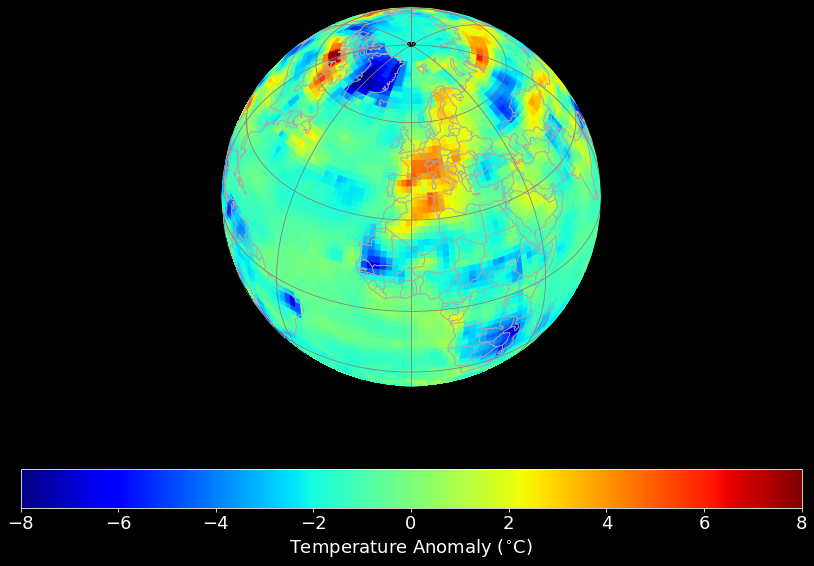

In [9]:
ax = plt.axes(projection=ccrs.Orthographic(0, 37))
fig = plt.gcf()

# Draw country borders
ax.add_feature(cartopy.feature.BORDERS, edgecolor='darkgray', lw=1)
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='darkgray', lw=1)

# Add longitude and latitude grid lines
ax.gridlines(draw_labels=False, dms=True, 
             xlocs=np.arange(-180, 180.1, 45), 
             ylocs=np.arange(-90, 90.1, 30),
             x_inline=False, y_inline=False, color='gray')

# Longitude corresponds to the x-axis and Latitude to the y-axis.
ax.imshow(img, origin="upper", extent=(-180, 180, -90, 90),
          # Tell cartopy what the original projection of the data is
          transform=ccrs.PlateCarree(), 
          cmap=plt.cm.jet, zorder=-1) 

# Make the background black
fig.patch.set_facecolor('black')
ax.patch.set_facecolor('black')

# Add the colorbar
norm = matplotlib.colors.Normalize(vmin=-8, vmax=8)
sm = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)
sm._A = []

cb = plt.colorbar(sm, orientation='horizontal')
cb.set_label(label=r'Temperature Anomaly (${}^{\circ}$C)', 
             fontsize=18, color='white')
cb.ax.xaxis.set_tick_params(labelsize=18, color='white')
cb.outline.set_edgecolor('white')
plt.setp(plt.getp(cb.ax.axes, 'xticklabels'), color='white', size=18)

fig.set_size_inches(14, 10)

# Animate

  3%|▎         | 2/73 [00:00<00:29,  2.39it/s]<ipython-input-10-9c287edec287>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection=ccrs.Orthographic(count, 37))
100%|██████████| 73/73 [00:49<00:00,  1.49it/s]

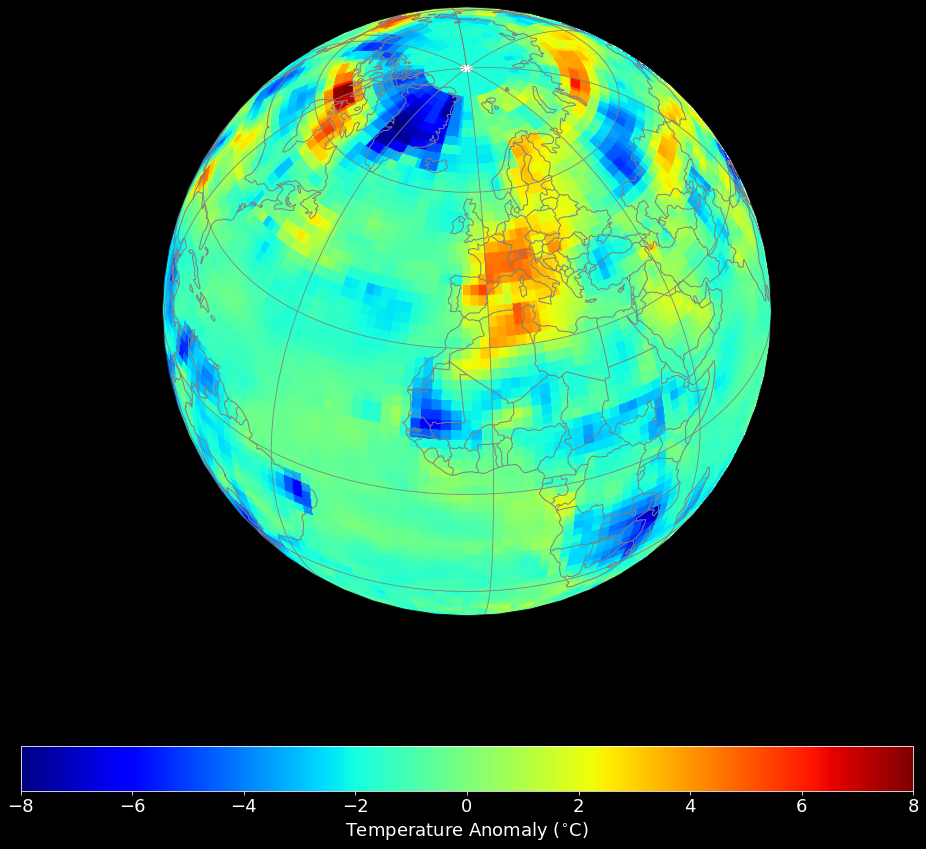

In [10]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Orthographic(0, 37)}, 
                       figsize=(16, 16))

bar = tqdm(total=73)
frame = 0

norm = matplotlib.colors.Normalize(vmin=-8, vmax=8)
sm = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)
sm._A = []

# Make the background black
fig.patch.set_facecolor('black')
ax.patch.set_facecolor('black')

# Define the function that will generate each frame
def animate(count):
    global frame
    frame += 1
    bar.update(1)
    ax = plt.axes(projection=ccrs.Orthographic(count, 37))
    fig = plt.gcf()

    # Add the heatmap as a "texture" on top of the globe
    ax.imshow(img, origin="upper", extent=(-180, 180, -90, 90),
              # Tell cartopy what the original projection of the data is
              transform=ccrs.PlateCarree(), 
              cmap=plt.cm.jet)  

    # Add longitude and latitude grid lines
    ax.gridlines(draw_labels=False, dms=True, 
                 xlocs=np.arange(-180, 180.1, 45), 
                 ylocs=np.arange(-90, 90.1, 30),
                 x_inline=False, y_inline=False, color='gray')

    # Draw country borders
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='gray', lw=1, alpha=1)
    ax.add_feature(cartopy.feature.COASTLINE, edgecolor='gray', lw=1, alpha=1)

    # Matplotlib calls the first frame twice,
    # this way we avoid having two colorbars 
    # in the first frame since we're adding the
    # colorbar within the animate function
    if frame != 2:
        # Add the colorbar
        norm = matplotlib.colors.Normalize(vmin=-8, vmax=8)
        sm = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)
        sm._A = []
        
        cb = plt.colorbar(sm, orientation='horizontal')
        cb.set_label(label=r'Temperature Anomaly (${}^{\circ}$C)', 
                     fontsize=18, color='white')
        cb.ax.xaxis.set_tick_params(labelsize=18, color='white')
        cb.outline.set_edgecolor('white')
        plt.setp(plt.getp(cb.ax.axes, 'xticklabels'), color='white', size=18)

    return 

# Create the animation object
anim = animation.FuncAnimation(fig, animate,
                               frames=np.arange(0, 360, 5), 
                               interval=1, blit=False, repeat=False)

# One second per 30 degree turn
writer = animation.writers['ffmpeg'](fps=6)

#5 Save the file
anim.save('Rotating Globe.mp4', writer=writer)

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>